In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, NullFormatter

from numpy import linalg as LA

import math
import scipy
from scipy.special import cbrt

import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter, NullFormatter



In [2]:
b2=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b2newD.csv"
b2=pd.read_csv(b2,  header=None)
#b1=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b1full.csv"
b1=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b1newD.csv"
b1=pd.read_csv(b1,  header=None)
#b3=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b3full.csv"
b3=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b3newD.csv"
b3=pd.read_csv(b3,  header=None)

#b4=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b4full.csv"
b4=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b4newDc.csv"
b4=pd.read_csv(b4, header=None)
#b5=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b5full.csv"
b5=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b5newD.csv"
b5=pd.read_csv(b5,  header=None)
#b6=r"C:\Users\SBogdanov\Vend_2020_March\Vend\Nortek\My\Single ADCP\b6full.csv"
b6=r"C:\Users\User\My Nortek\15_12_20\Beam velocitie_all depths_burst aver/b6newD.csv"
b6=pd.read_csv(b6,  header=None)


In [3]:
VV2=pd.DataFrame( data = b1 , index = None , columns = None , dtype = None ,
copy = False )
VV1=pd.DataFrame( data = b2 , index = None , columns = None , dtype = None ,
copy = False )
VV3=pd.DataFrame( data = b3 , index = None , columns = None , dtype = None ,
copy = False )

VV4=pd.DataFrame( data = b4 , index = None , columns = None , dtype = None ,
copy = False )
VV5=pd.DataFrame( data = b5 , index = None , columns = None , dtype = None ,
copy = False )
VV6=pd.DataFrame( data = b6 , index = None , columns = None , dtype = None ,
copy = False )


VVV1=VV1.drop(VV1.columns[[0,1,2]],axis='columns')
VVV2=VV2.drop(VV2.columns[[0,1,2]],axis='columns')
VVV3=VV3.drop(VV3.columns[[0,1,2]],axis='columns')
VVV4=VV4.drop(VV4.columns[[0,1,2]],axis='columns')
VVV5=VV5.drop(VV5.columns[[0,1,2]],axis='columns')
VVV6=VV6.drop(VV6.columns[[0,1,2]],axis='columns')



#ti=9090 # Это полночь, с 02 на 03 апреля; старт приборов был в 16:30 27 марта 2020.
ti=9810 # Это полдень 03 апреля
#tf=9810+10
tf=13500 # Соответствует 01:30, 7 апреля.

time=np.arange(ti,tf,1)
th=time-ti #450 # Время в минутах, отсчитываемое от 00:00 28 марта.


V1=VVV1.iloc[ti:tf]
V2=VVV2.iloc[ti:tf]
V3=VVV3.iloc[ti:tf]
V4=VVV4.iloc[ti:tf]
V5=VVV5.iloc[ti:tf]
V6=VVV6.iloc[ti:tf]

t=100

V1m=V1.rolling(t,center=True).mean()
V2m=V2.rolling(t,center=True).mean()
V3m=V3.rolling(t,center=True).mean()
V4m=V4.rolling(t,center=True).mean()
V5m=V5.rolling(t,center=True).mean()
V6m=V6.rolling(t,center=True).mean()


V1f=V1-V1m
V2f=V2-V2m
V3f=V3-V3m
V4f=V4-V4m
V5f=V5-V5m
V6f=V6-V6m

In [4]:
a0=25

sin0=np.sin(6.28*a0/360)
cos0=(1-sin0**2)**(1/2)
sina=sin0*3**(1/2)/2 # Это синус половинного угла между лучами
cosa=(1-sina*2)**(1/2)
cos2a=1-2*sina**2 # Это косинус угла между лучами
sin2a=2*sina*cosa
cos3a=cos2a*cosa-sin2a*sina

ta=np.tan(6.28*a0/360)
cta=1/ta

c=sin0**(-2)
d=sin0**(-1)


def closest(lst, K): 
      
     lst = np.asarray(lst) 
     idx = (np.abs(lst - K)).argmin() 
     return lst[idx] 
      
lst = V1.columns#[3.64, 5.2, 9.42, 9.35, 8.5, 8] 


# Задаем матрицу для расчета по single device методике
M=np.matrix([ 
    [1, 0, 2*cta, 0, 0, cta**2], 
    [0.25, -(3**(0.5)/2), -cta, 0.75, 3**(0.5)*cta, cta**2], 
    [0.25, (3**(.5)/2), -cta, 0.75, -3**(0.5)*cta, cta**2], 
    [-0.5, -(3**(.5)/2), 0.5*cta, 0, -(3**(.5)/2)*cta, cta**2], 
    [-0.5, (3**.5/2), 0.5*cta, 0,3**(0.5)*cta/2, cta**2],
    [0.25, 0, -cta, -0.75, 0, cta**2] 
]) 

Qinv=M**(-1)


# Для построения Ламли
x1=np.mgrid[-1:8:100j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

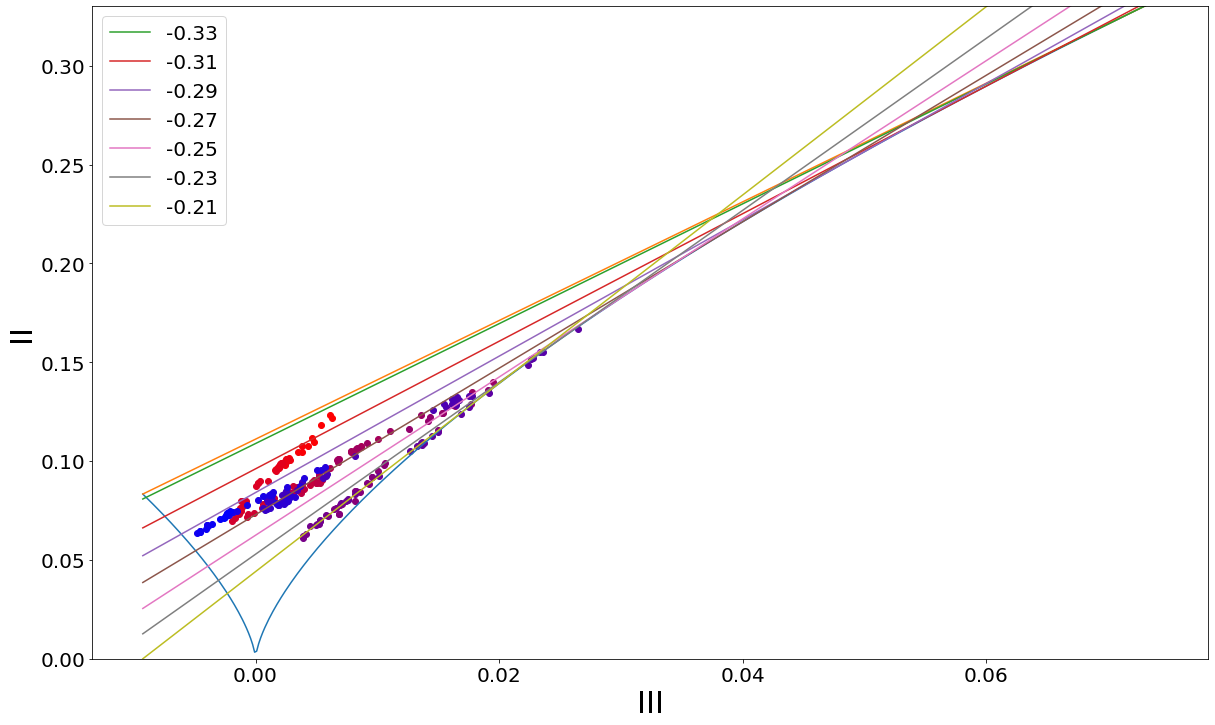

In [5]:
#L0=closest(lst, (0.025*n))# Это расстояние по первому лучу до точки A (или по второму до точки B)
#AB=2*L0*sina # Это расстояние r между точками A и B

plt.figure(figsize=(20,12))

L00=65
L01=75

L0=L00
while L0 < L01:

    AB=2*L0*sina

    A1=closest(lst, (L0-AB/2)) #Это расстояние от A до верхней референсной точки при вычислении SF
    A2=closest(lst, (L0+AB/2)) #Это расстояние от A до нижней референсной точки при вычислении SF

    A012=V1[L0]*V2[L0]
    A013=V1[L0]*V3[L0]
    A023=V2[L0]*V3[L0]
    A045=V4[L0]*V5[L0]
    A046=V4[L0]*V6[L0]
    A056=V5[L0]*V6[L0]

    D_LL1=(V1[A2]-V1[A1])**2
    D_LL2=(V2[A2]-V2[A1])**2
    D_LL3=(V3[A2]-V3[A1])**2

    D_LL4=(V4[A2]-V4[A1])**2
    D_LL5=(V5[A2]-V5[A1])**2
    D_LL6=(V6[A2]-V6[A1])**2

    D_LL=(D_LL1+D_LL2+D_LL3)/3
    sD_LL=(D_LL4+D_LL5+D_LL6)/3 # Здесь и далее префикс s используется для второго прибора.

    b1b2=A012+(2*cosa**2/3-sina**2/2)*D_LL#-V1m*V2m # Здесь изменен знак во втором слагаемом п.ч.
    b1b3=A013+(2*cosa**2/3-sina**2/2)*D_LL#-V1m*V3m # Здесь изменен знак во втором слагаемом п.ч.
    b2b3=A023+(2*cosa**2/3-sina**2/2)*D_LL#-V2m*V3m # Здесь изменен знак во втором слагаемом п.ч.

    b4b5=A045+(2*cosa**2/3-sina**2/2)*sD_LL#-V1m*V2m # Здесь изменен знак во втором слагаемом п.ч.
    b4b6=A046+(2*cosa**2/3-sina**2/2)*sD_LL#-V1m*V3m # Здесь изменен знак во втором слагаемом п.ч.
    b5b6=A056+(2*cosa**2/3-sina**2/2)*sD_LL#-V2m*V3m # Здесь изменен знак во втором слагаемом п.ч.

    b1int=V1f[L0]**2 # Интенсивность пульсаций вдоль первого 
    b11=b1int.rolling(t,center=True).mean()
    b2int=V2f[L0]**2 # Интенсивность пульсаций вдоль второго 
    b22=b2int.rolling(t,center=True).mean()
    b3int=V3f[L0]**2 # Интенсивность пульсаций вдоль третьего 
    b33=b3int.rolling(t,center=True).mean()
    b4int=V4f[L0]**2 # Интенсивность пульсаций вдоль первого 
    b44=b4int.rolling(t,center=True).mean()
    b5int=V5f[L0]**2 # Интенсивность пульсаций вдоль второго 
    b55=b5int.rolling(t,center=True).mean()
    b7int=V6f[L0]**2 # Интенсивность пульсаций вдоль третьего 
    b77=b7int.rolling(t,center=True).mean()
    b6int=V1f[L0]*V4f[L0] # Корреляция в точке пересечения 1 и 4 лучей
    b66=b6int.rolling(t,center=True).mean()

    b12=b1b2.rolling(t,center=True).mean()-V1m[L0]*V2m[L0]
    b13=b1b3.rolling(t,center=True).mean()-V1m[L0]*V3m[L0]
    b23=b2b3.rolling(t,center=True).mean()-V2m[L0]*V3m[L0]

    b45=b4b5.rolling(t,center=True).mean()-V4m[L0]*V5m[L0]
    b46=b4b6.rolling(t,center=True).mean()-V4m[L0]*V6m[L0]
    b56=b5b6.rolling(t,center=True).mean()-V5m[L0]*V6m[L0]

    Q1= 4.44444444e-01*b11+ 1.11111111e-01*b22+ 1.11111111e-01*b33 -4.44444444e-01*b12 -4.44444444e-01*b13+  (
    2.22222222e-01*b23)
    Q12= 0  -1.92450090e-01*b22+   1.92450090e-01*b33+ 3.84900179e-01*b12  -3.84900179e-01*b13  
    Q13= 1.03564086e-01*b11  -5.17820428e-02*b22  -5.17820428e-02*b33 +5.17820428e-02*b12+ 5.17820428e-02*b13-1.03564086e-01*b23
    Q2=  0+   3.33333333e-01*b22+   3.33333333e-01*b33 -6.66666667e-01*b23
    Q23= 0+8.96891291e-02*b22 -8.96891291e-02*b33+ 8.96891291e-02*b12 -8.96891291e-02*b13 
    Q3= 2.41324196e-02*b11+ 2.41324196e-02*b22+ 2.41324196e-02*b33+ 4.82648392e-02*b12+ 4.82648392e-02*b13+ 4.82648392e-02*b23

    sQ1= 4.44444444e-01*b44+ 1.11111111e-01*b55+ 1.11111111e-01*b77 -4.44444444e-01*b45 -4.44444444e-01*b46+  2.22222222e-01*b56
    sQ12= 0  -1.92450090e-01*b55+   1.92450090e-01*b77+ 3.84900179e-01*b45  -3.84900179e-01*b46  
    sQ13= 1.03564086e-01*b44  -5.17820428e-02*b55  -5.17820428e-02*b77 +5.17820428e-02*b45+ 5.17820428e-02*b46-1.03564086e-01*b56
    sQ2=  0+   3.33333333e-01*b55+   3.33333333e-01*b77 -6.66666667e-01*b56
    sQ23= 0+8.96891291e-02*b55 -8.96891291e-02*b77+ 8.96891291e-02*b45 -8.96891291e-02*b46 
    sQ3= 2.41324196e-02*b44+ 2.41324196e-02*b55+ 2.41324196e-02*b77+ 4.82648392e-02*b45+ 4.82648392e-02*b46+ 4.82648392e-02*b56

    Q=Q1+Q2+Q3

    a11=(Q1/Q)-1/3
    a22=(Q2/Q)-1/3
    a33=(Q3/Q)-1/3
    a12=Q12/Q
    a13=Q13/Q
    a23=Q23/Q

    b2_11=a11**2+a12**2+a13**2
    b2_12=a11*a12+a12*a22+a13*a23
    b2_13=a11*a13+a12*a23+a13*a33
    b2_22=a12**2+a22**2+a23**2
    b2_23=a12*a13+a22*a23+a33*a23
    b2_33=a13**2+a23**2+a33**2
    II=(b2_11+b2_22+b2_33)/2
    III=(a11*b2_11+a22*b2_22+a33*b2_33+2*a12*b2_12+2*a13*b2_13+2*a23*b2_13)/3
    
    sQ=sQ1+sQ2+sQ3

    sa11=(sQ1/sQ)-1/3
    sa22=(sQ2/sQ)-1/3
    sa33=(sQ3/sQ)-1/3
    sa12=sQ12/sQ
    sa13=sQ13/sQ
    sa23=sQ23/sQ

    sb2_11=sa11**2+sa12**2+sa13**2
    sb2_12=sa11*sa12+a12*sa22+sa13*sa23
    sb2_13=sa11*sa13+sa12*sa23+sa13*sa33
    sb2_22=sa12**2+sa22**2+sa23**2
    sb2_23=sa12*sa13+sa22*sa23+sa33*sa23
    sb2_33=sa13**2+sa23**2+sa33**2
    sII=(sb2_11+sb2_22+sb2_33)/2
    sIII=(sa11*sb2_11+sa22*sb2_22+sa33*sb2_33+2*sa12*sb2_12+2*sa13*sb2_13+2*sa23*sb2_13)/3


    #tl0=9800 # Это полдень, 03 апреля; старт приборов был в 16:30 27 марта 2020.
    #tl0=11240 # Это полдень, 04 апреля
    tl0=9800+2550 #9800+120 #9800+1900 #9800 +2520 #9800+220 #12330 #9900+120 #12330 #9900+120#12680-120 #11120 +240+120+120+120 #9900 #12000 #11800 #11600 #11400 #11200 #11000
    tl1=tl0+120+120 #240 #120
    tl=tl0
    while tl < tl1:
        IIIl=III.loc[tl]
        IIl=II.loc[tl]
        sIIIl=sIII.loc[tl]
        sIIl=sII.loc[tl]
        alp=0.1+(tl1-tl)/(tl1-tl0)
        #plt.scatter(cbrt(IIIl/2),(IIl/3)**(1/2),c='blue', s=10+(tl-tl0)**(1),alpha=0.3,label='I device') #, marker="s")
                    #c=[1-(L0-L00)/(L01-L00),0,(L0-L00)/(L01-L00)], \
        #plt.scatter(cbrt(sIIIl/2),(sIIl/3)**(1/2),c='red', s=10+(tl-tl0)**(1),alpha=0.3) #, marker="*")
        
        #sc=plt.scatter((IIIl),(IIl),c=((tl1-tl)/(tl1-tl0),0,(tl-tl0)/(tl1-tl0)))
        
        sc=plt.scatter((sIIIl),(sIIl),c=((tl1-tl)/(tl1-tl0),0,(tl-tl0)/(tl1-tl0)))#c='red')#, s=10+(tl-tl0)**(1),alpha=0.3) #, marker="*")
                    #c=[1-(L0-L00)/(L01-L00),0,(L0-L00)/(L01-L00)], \ s=10+(tl-tl0)**(1),alpha=0.3)
    #plt.scatter(IIIl,IIl)
        tl=tl+1
    L0=L0+25 #25

    
    
x1=np.mgrid[-1:8:500j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)

plt.plot(x,ya)
plt.plot(x,yp)#, label='13') 

l3i=-0.33
l3f=-0.2
l3=l3i
while l3<l3f:
#xs=np.mgrid[-1:8:500j]
    l3r=round(l3, 2)
    plt.plot(x,l3**2-x/l3, label=l3r)
    #plt.xlim(-0.01,(l3**2-1/9)/(3+1/l3))
    l3=l3+0.02


plt.legend(fontsize=20)
plt.ylim([0,0.33])


plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20)    #  Размер подписи

x2=cbrt(x/2)

plt.xlabel('III',fontsize=30)
plt.ylabel('II',fontsize=30)

plt.show()

In [6]:
Lu=pd.DataFrame(II)
Lu['III']=III
Lu['plane']=II-1/9-3*III
Lu['ax']=II-3*((abs(III))/2)**(2/3)



Lu.rename(columns={0:'II'}, inplace=True)

Lu3=Lu.drop(Lu[(Lu.II > 1/3)].index,inplace=False) # &(Lu.plane < 0)].index)
Lu2=Lu3.drop(Lu3[(Lu3.plane>0)].index)
Lu1=Lu2.drop(Lu2[(Lu2.III < -0.02)].index)


In [7]:
tl=90+120
z=np.arange(tl-330, tl-90,1)
z
#z1=np.arange(0,240,1)
z1=np.arange(0,4,1/60)




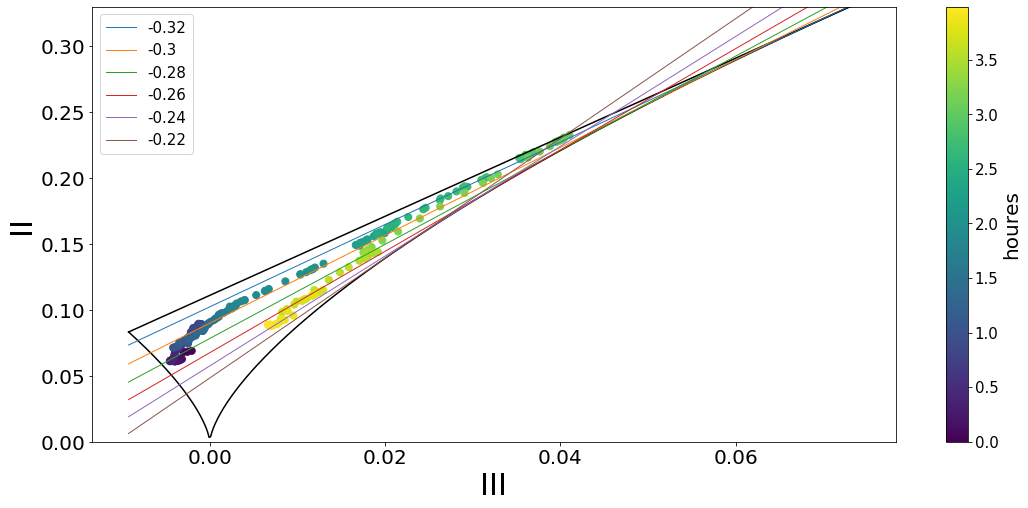

In [8]:
#cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('viridis')

plt.figure(figsize=(18,8))
tl=90+120
IIIl=sIII.iloc[tl:tl+240]
IIl=sII.iloc[tl:tl+240]

x1=np.mgrid[-1:8:500j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)

plt.plot(x,ya,color='black')
plt.plot(x,yp,color='black')#, label='13') 

sc=plt.scatter(IIIl,IIl,c=z1,cmap=cm,s=50) #"summer") #vmin=0, vmax=240, s=35, cmap=cm)

plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20) 

plt.xlabel('III',fontsize=30)
plt.ylabel('II',fontsize=30)

l3i=-0.32
l3f=-0.2
l3=l3i
while l3<l3f:
#xs=np.mgrid[-1:8:500j]
    l3r=round(l3, 2)
    plt.plot(x,l3**2-x/l3, label=l3r,linewidth=1)#,color='black')
    #plt.xlim(-0.01,(l3**2-1/9)/(3+1/l3))
    l3=l3+0.02


plt.legend(fontsize=15)
plt.ylim([0,0.33])

cb=plt.colorbar(alpha=1) #,label='houres',size=50)#, labelsize=15) #label=tl-330) #sc)

cb.set_label(label='houres', size=20) #'extralarge', weight='bold')
cb.ax.tick_params(axis="both", labelsize=15)
#cb.ax.tick_params(labelsize='large')

plt.show()



#cm = plt.cm.get_cmap('RdYlBu')
#xy = range(20)
#z = xy
#sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)

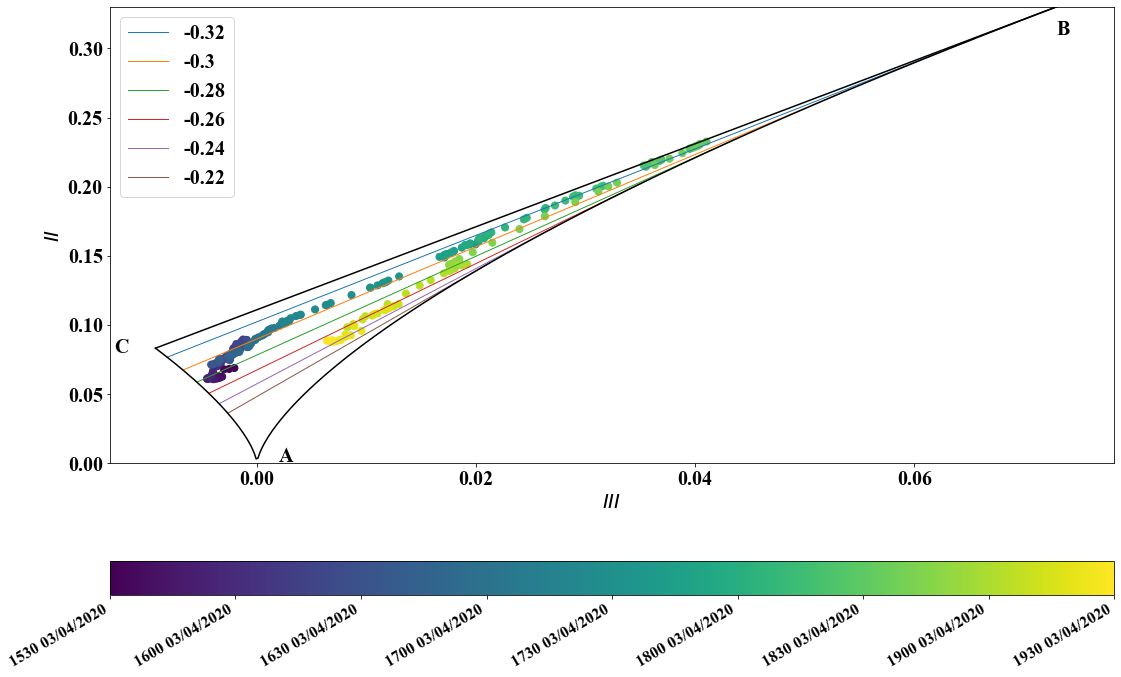

In [10]:
#####################Максимов#####################
import matplotlib.pyplot as p
import datetime
import numpy as n
from scipy.optimize import root
from matplotlib import dates as mdates

plt.rcParams["font.family"] = "Times New Roman" #Задание шрифта значений осей на графике


tl=90+120
t11 = tl
t22 = tl+241

#start = datetime.datetime(2020, 3, 27, 16,30)
start = datetime.datetime(2020, 4, 3, 12,0)

time = [start + datetime.timedelta(minutes=i) for i in range(t11,t22)]

IIIl=sIII.iloc[tl:tl+241]
IIl=sII.iloc[tl:tl+241]
p.figure(figsize=(18,12))
for i in range(t22-t11):
    time[i]= np.datetime64(time[i])
color = mdates.date2num(time)

l3i=-0.32
l3f=-0.2
l3=l3i
while l3<l3f:
    l3r=round(l3, 2)
    def func(x):
        left = 3*(1/4 * x**2)**(1/3)
        right = ((l3)**2)-(x/(l3))
        return left-right
    sol = root(func, -0.005)
    xx1=float(sol.x)
    sol = root(func, +0.05)
    xx2=float(sol.x)
    x1 = n.linspace(xx1, xx2, 100)
    II1 = ((l3)**2)-     (x1/(l3))
    y1 = II1
    p.plot(x1, II1,label=l3r,linewidth=1)
    l3=l3+0.02
    
xx1=np.mgrid[-1:8:500j]
xx=xx1/108
yp=1/9+3*xx
ya=3*((abs(xx))/2)**(2/3)
plt.plot(xx,ya,color='black')
plt.plot(xx,yp,color='black')
p.scatter(IIIl,IIl,c=color,cmap=plt.cm.get_cmap('viridis'),s=50) 

cb = p.colorbar(orientation="horizontal", aspect=30)
loc = mdates.AutoDateLocator()
cb.ax.xaxis.set_major_locator(loc)
cb.ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(loc, formats = ['', '', '', '%H%M %d/%m/20%y', '%H%M %d/%m/20%y', ''], offset_formats=['', '', '', '', '', '']))
p.setp(cb.ax.get_xticklabels(), rotation=30, ha="right")
cb.ax.tick_params(labelsize = 16)

p.tick_params(axis='both', which='major', labelsize=20)
p.ylabel('$II$',fontsize=20,fontname="Times New Roman")
p.xlabel('$III$',fontsize=20, fontname="Times New Roman")
p.legend(['-0.32','-0.3','-0.28','-0.26','-0.24','-0.22'],fontsize = 20)
p.ylim([0,0.33])

p.text(0.002, 0.001, 'A',fontsize=20)
p.text(0.073, 0.31, 'B',fontsize=20)
p.text(-0.013, 0.08, 'C',fontsize=20)


p.savefig("Fig 4b.png",dpi=600)

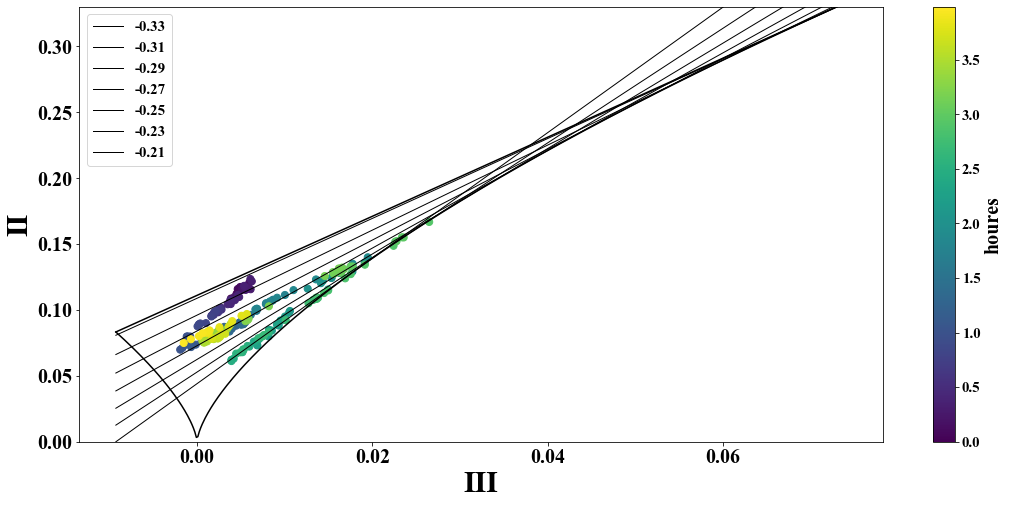

12330    0.003865
12331    0.004521
12332    0.005046
12333    0.005261
12334    0.004732
           ...   
12565    0.001230
12566    0.000215
12567    0.000649
12568   -0.000700
12569   -0.001516
Length: 240, dtype: float64

In [11]:
plt.figure(figsize=(18,8))
tl=2520
IIIl=sIII.iloc[tl:tl+240]
IIl=sII.iloc[tl:tl+240]

x1=np.mgrid[-1:8:500j]
x=x1/108
yp=1/9+3*x
ya=3*((abs(x))/2)**(2/3)

plt.plot(x,ya,color='black')
plt.plot(x,yp,color='black')#, label='13') 

sc=plt.scatter(IIIl,IIl,c=z1,cmap=cm,s=50) #"summer") #vmin=0, vmax=240, s=35, cmap=cm)

plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               labelsize = 20) 

plt.xlabel('III',fontsize=30)
plt.ylabel('II',fontsize=30)

l3i=-0.33
l3f=-0.2
l3=l3i
while l3<l3f:
#xs=np.mgrid[-1:8:500j]
    l3r=round(l3, 2)
    plt.plot(x,l3**2-x/l3, label=l3r,linewidth=1,color='black')
    #plt.xlim(-0.01,(l3**2-1/9)/(3+1/l3))
    l3=l3+0.02


plt.legend(fontsize=15)
plt.ylim([0,0.33])

cb=plt.colorbar(alpha=1) #,label='houres',size=50)#, labelsize=15) #label=tl-330) #sc)

cb.set_label(label='houres', size=20) #'extralarge', weight='bold')
cb.ax.tick_params(axis="both", labelsize=15)

#plt.colorbar()# label=tl-330) #sc)
plt.show()

IIIl

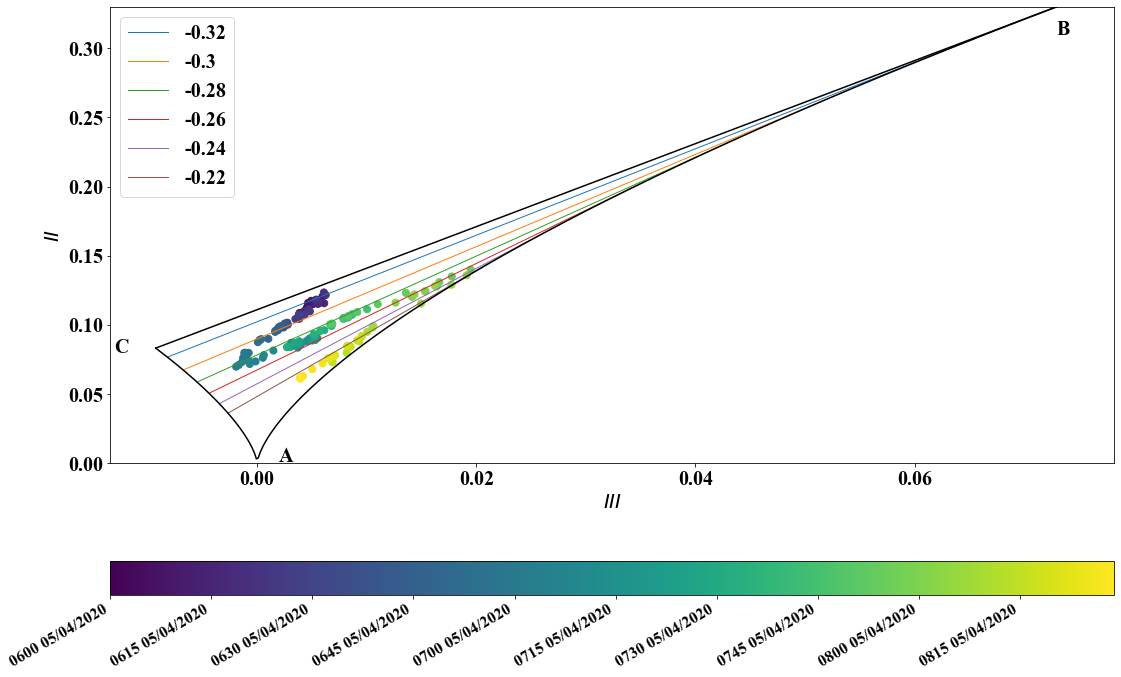

In [12]:
#####################Максимов#####################
import matplotlib.pyplot as p
import datetime
import numpy as n
from scipy.optimize import root
from matplotlib import dates as mdates

plt.rcParams["font.family"] = "Times New Roman" #Задание шрифта значений осей на графике


tl=2520
t11 = tl
Delta=150
t22 = tl+Delta #180 #241

#start = datetime.datetime(2020, 3, 27, 16,30)
start = datetime.datetime(2020, 4, 3, 12,0)
time = [start + datetime.timedelta(minutes=i) for i in range(t11,t22)]

IIIl=sIII.iloc[tl:tl+Delta]#241]
IIl=sII.iloc[tl:tl+Delta]#241]
p.figure(figsize=(18,12))
for i in range(t22-t11):
    time[i]= np.datetime64(time[i])
color = mdates.date2num(time)

l3i=-0.32
l3f=-0.2
l3=l3i
while l3<l3f:
    l3r=round(l3, 2)
    def func(x):
        left = 3*(1/4 * x**2)**(1/3)
        right = ((l3)**2)-(x/(l3))
        return left-right
    sol = root(func, -0.005)
    xx1=float(sol.x)
    sol = root(func, +0.05)
    xx2=float(sol.x)
    x1 = n.linspace(xx1, xx2, 100)
    II1 = ((l3)**2)-     (x1/(l3))
    y1 = II1
    p.plot(x1, II1,label=l3r,linewidth=1)
    l3=l3+0.02
    
xx1=np.mgrid[-1:8:500j]
xx=xx1/108
yp=1/9+3*xx
ya=3*((abs(xx))/2)**(2/3)
plt.plot(xx,ya,color='black')
plt.plot(xx,yp,color='black')
p.scatter(IIIl,IIl,c=color,cmap=plt.cm.get_cmap('viridis'),s=50) 

cb = p.colorbar(orientation="horizontal", aspect=30)
loc = mdates.AutoDateLocator()
cb.ax.xaxis.set_major_locator(loc)
cb.ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(loc, formats = ['', '', '', '%H%M %d/%m/20%y', '%H%M %d/%m/20%y', ''], offset_formats=['', '', '', '', '', '']))
p.setp(cb.ax.get_xticklabels(), rotation=30, ha="right")
cb.ax.tick_params(labelsize = 16)

p.tick_params(axis='both', which='major', labelsize=20)
p.ylabel('$II$',fontsize=20,fontname="Times New Roman")
p.xlabel('$III$',fontsize=20, fontname="Times New Roman")
p.legend(['-0.32','-0.3','-0.28','-0.26','-0.24','-0.22'],fontsize = 20)
p.ylim([0,0.33])

p.text(0.002, 0.001, 'A',fontsize=20)
p.text(0.073, 0.31, 'B',fontsize=20)
p.text(-0.013, 0.08, 'C',fontsize=20)


p.savefig("Fig 4a_alt2.png",dpi=600)